# Extra Trees Model

### * Model trees_1000 * ---> (RMSE=559.0019)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [2]:
cleantrain_df = pd.read_csv("../inputs/cleantrain.csv", index_col = 0)
cleanpredict_df = pd.read_csv("../inputs/cleanpredict.csv", index_col = 0)

In [3]:
X = cleantrain_df.drop(columns=["price"])
y = cleantrain_df["price"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32364, 9) (8091, 9) (32364,) (8091,)


#### Apply the model

In [5]:
model = ExtraTreesRegressor(n_estimators=100)
fitted_model = model.fit(X, y)

In [6]:
y_pred = fitted_model.predict(cleanpredict_df)
y_pred

array([16793.01333333, 17495.18      ,  1547.6       , ...,
        4107.48      ,   853.97      ,  1551.15      ])

In [7]:
upload_df = pd.DataFrame({
    'price' : y_pred
})
upload_df.index.rename("id",inplace = True)
upload_df.head()

,price
id,
0,16793.013333
1,17495.180000
2,1547.600000
3,573.020000
4,4473.370000


In [8]:
upload_df.to_csv("./Output/predictions_extratrees_regression_prueba1.csv", header=True)

#### Uploaded

## Graph

In [9]:
y_test.shape

(8091,)

In [10]:
y_pred = fitted_model.predict(X_test)
y_pred.shape

(8091,)

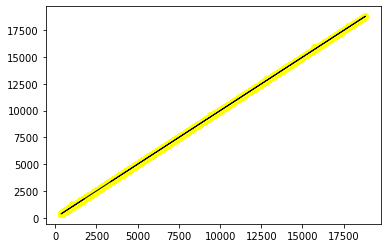

In [13]:
plt.scatter(y_pred, y_test,  color='yellow')
plt.plot(y_test, y_test, color='black', linewidth=1)
plt.show()